In [1]:
import os
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
hdf = pd.read_csv('housing.csv')

In [3]:
full_hdf = hdf.copy()

In [4]:
# #New attributes
# hdf['rooms_per_house'] = hdf['total_rooms'] / hdf['households']
# hdf['bebrooms_per_room'] = hdf['total_bedrooms'] / hdf['total_rooms']
# hdf['population_per_house_hold'] = hdf['population'] / hdf['households']

In [5]:
#Processing of categorical features
h_cat_en_bedr, h_categories_bedr = hdf['ocean_proximity'].factorize()
h_categories_bedr
h_cat_en_bedr

array([0, 0, 0, ..., 2, 2, 2], dtype=int64)

In [6]:
from sklearn.preprocessing import OneHotEncoder

In [7]:
oh = OneHotEncoder()

In [8]:
coded_bedr = oh.fit_transform(h_cat_en_bedr.reshape(-1,1))

In [9]:
coded_bedr.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [10]:
proxy_bedr = pd.DataFrame(coded_bedr.toarray(), index = hdf.index, columns = ['1','2','3','4','5'])

In [11]:
hdf = pd.concat([hdf, proxy_bedr], axis = 1)

In [12]:
hdf

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,1,2,3,4,5
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,1.0,0.0,0.0,0.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1.0,0.0,0.0,0.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,1.0,0.0,0.0,0.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,1.0,0.0,0.0,0.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,0.0,0.0,1.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,0.0,0.0,1.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,0.0,0.0,1.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,0.0,0.0,1.0,0.0,0.0


In [13]:
hdf = hdf.drop(['ocean_proximity'], axis = 1)

In [14]:
hdf

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,1,2,3,4,5
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,1.0,0.0,0.0,0.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,1.0,0.0,0.0,0.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,1.0,0.0,0.0,0.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,1.0,0.0,0.0,0.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0.0,0.0,1.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0.0,0.0,1.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0.0,0.0,1.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0.0,0.0,1.0,0.0,0.0


In [15]:
#Creating dataset with null value
null_hdf = hdf.loc[hdf['total_bedrooms'].isnull()].copy()
null_hdf

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,1,2,3,4,5
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,1.0,0.0,0.0,0.0,0.0
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,1.0,0.0,0.0,0.0,0.0
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,1.0,0.0,0.0,0.0,0.0
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,1.0,0.0,0.0,0.0,0.0
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,0.0,0.0,0.0,1.0,0.0
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,0.0,0.0,0.0,1.0,0.0
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,0.0,1.0,0.0,0.0,0.0
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,0.0,1.0,0.0,0.0,0.0


In [16]:
#Creating dataset without null value
test_hdf = hdf.dropna(subset = ['total_bedrooms'])
test_hdf.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
1                     0
2                     0
3                     0
4                     0
5                     0
dtype: int64

In [17]:
#Label separation
X_bedr = test_hdf.drop(['total_bedrooms'], axis = 1)
Y_bedr = test_hdf['total_bedrooms']

In [18]:
#Create a validation set
from sklearn.model_selection import train_test_split

X_train_bedr, X_test_bedr, Y_train_bedr,  Y_test_bedr =  train_test_split(X_bedr, Y_bedr, test_size = 0.2, random_state = 42)

In [19]:
X_test_bedr

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,1,2,3,4,5
14416,-117.24,32.79,20.0,961.0,525.0,254.0,3.1838,245800.0,0.0,0.0,0.0,1.0,0.0
16383,-121.29,38.01,2.0,6403.0,3327.0,957.0,4.4871,137900.0,0.0,0.0,1.0,0.0,0.0
7731,-118.14,33.92,31.0,3731.0,2313.0,801.0,3.2237,218200.0,0.0,1.0,0.0,0.0,0.0
1410,-122.07,37.94,30.0,1260.0,707.0,221.0,2.8920,220800.0,1.0,0.0,0.0,0.0,0.0
1335,-121.89,37.99,4.0,2171.0,928.0,461.0,4.1016,170500.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8291,-118.15,33.76,36.0,2916.0,1183.0,749.0,3.5985,500001.0,0.0,0.0,0.0,1.0,0.0
6274,-117.95,34.03,33.0,1782.0,1517.0,376.0,3.3389,157900.0,0.0,1.0,0.0,0.0,0.0
2997,-119.03,35.32,12.0,2721.0,1294.0,523.0,2.5575,100200.0,0.0,0.0,1.0,0.0,0.0
13440,-117.42,34.08,28.0,2300.0,1312.0,444.0,3.4844,127700.0,0.0,0.0,1.0,0.0,0.0


In [20]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()

In [21]:
someData_bedr = X_test_bedr[:6]
someLabels_bedr = Y_test_bedr[:6]

In [22]:
forest.fit(X_train_bedr, Y_train_bedr)

RandomForestRegressor()

In [23]:
preds_bedr = forest.predict(someData_bedr)

In [24]:
preds_bedr

array([ 263.11, 1064.25,  832.26,  244.31,  530.54,  220.7 ])

In [25]:
someLabels_bedr

14416     278.0
16383    1116.0
7731      853.0
1410      276.0
1335      597.0
16260     189.0
Name: total_bedrooms, dtype: float64

In [26]:
from sklearn.metrics import mean_squared_error
import math
mse = mean_squared_error(preds_bedr, someLabels_bedr)
rmse = math.sqrt(mse)
rmse

40.32369010065093

In [27]:
not_null_preds_to_bedr = forest.predict(null_hdf.drop(['total_bedrooms'], axis = 1))
not_null_preds_to_bedr

array([ 223.67,  267.42, 1374.24,  145.59,  151.34,  569.32,  624.15,
       1083.45,  567.15,  502.44,  689.27,  385.18, 1338.3 , 1024.39,
        590.74,  244.99,  294.63,  254.42,  268.39,  761.99,  290.1 ,
        113.32,   25.14,  674.62,  480.59,  958.69,  823.06,  641.76,
       1298.29,  560.59,  785.04, 1601.08, 1373.98,  422.77,  708.93,
        159.3 ,  583.68,  297.16,  330.69,  783.99,  438.73,  467.98,
        291.5 , 1316.7 ,  712.04, 1551.79,  464.42,  522.01,  181.44,
        275.8 ,  510.99,  291.73,  286.5 ,  790.61,  237.27,  501.76,
        309.51,  432.56,  820.81,  466.53,  344.77,  333.36,  545.27,
        361.08,  772.11,  507.84,  527.05,  413.86, 1304.9 ,  501.22,
        266.58,  162.63, 1115.23,  656.04,  360.23,  552.57,  233.26,
        120.67,  481.13,  448.82, 1281.96,  216.19,  259.75,  644.53,
        269.84,  142.45,  212.19,  283.84,  981.3 ,  291.6 ,  141.39,
       1534.81,  143.32,  297.13,  119.8 ,  449.02,  431.44,   64.64,
         78.17,  471

In [28]:
#Add predicted total_bedrooms values to dataset with NaN values
null_hdf['total_bedrooms'].fillna({null_hdf.index[i]: not_null_preds_to_bedr[i] for i in range(len(not_null_preds_to_bedr))}, inplace = True)

In [29]:
null_hdf

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,1,2,3,4,5
290,-122.16,37.77,47.0,1256.0,223.67,570.0,218.0,4.3750,161900.0,1.0,0.0,0.0,0.0,0.0
341,-122.17,37.75,38.0,992.0,267.42,732.0,259.0,1.6196,85100.0,1.0,0.0,0.0,0.0,0.0
538,-122.28,37.78,29.0,5154.0,1374.24,3741.0,1273.0,2.5762,173400.0,1.0,0.0,0.0,0.0,0.0
563,-122.24,37.75,45.0,891.0,145.59,384.0,146.0,4.9489,247100.0,1.0,0.0,0.0,0.0,0.0
696,-122.10,37.69,41.0,746.0,151.34,387.0,161.0,3.9063,178400.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,816.36,3171.0,779.0,3.3409,220500.0,0.0,0.0,0.0,1.0,0.0
20268,-119.18,34.19,19.0,2393.0,829.15,1938.0,762.0,1.6953,167400.0,0.0,0.0,0.0,1.0,0.0
20372,-118.88,34.17,15.0,4260.0,716.21,1701.0,669.0,5.1033,410700.0,0.0,1.0,0.0,0.0,0.0
20460,-118.75,34.29,17.0,5512.0,836.46,2734.0,814.0,6.6073,258100.0,0.0,1.0,0.0,0.0,0.0


In [30]:
#Join two datasets
full_data = pd.concat([test_hdf, null_hdf], axis=0)
full_data.sort_index(inplace = True)

In [31]:
#Random Forest with full dataset

In [32]:
X = full_data.drop(['median_house_value'], axis = 1)

In [33]:
Y = full_data['median_house_value']

In [34]:
X_train, X_test, Y_train,  Y_test =  train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [35]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,1,2,3,4,5
20046,-119.01,36.06,25.0,1505.0,386.78,1392.0,359.0,1.6812,0.0,0.0,1.0,0.0,0.0
3024,-119.46,35.14,30.0,2943.0,674.62,1565.0,584.0,2.5313,0.0,0.0,1.0,0.0,0.0
15663,-122.44,37.80,52.0,3830.0,1096.87,1310.0,963.0,3.4801,1.0,0.0,0.0,0.0,0.0
20484,-118.72,34.28,17.0,3051.0,506.97,1705.0,495.0,5.7376,0.0,1.0,0.0,0.0,0.0
9814,-121.93,36.62,34.0,2351.0,449.02,1063.0,428.0,3.7250,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15362,-117.22,33.36,16.0,3165.0,482.00,1351.0,452.0,4.6050,0.0,1.0,0.0,0.0,0.0
16623,-120.83,35.36,28.0,4323.0,886.00,1650.0,705.0,2.7266,0.0,0.0,0.0,1.0,0.0
18086,-122.05,37.31,25.0,4111.0,538.00,1585.0,568.0,9.2298,0.0,1.0,0.0,0.0,0.0
2144,-119.76,36.77,36.0,2507.0,466.00,1227.0,474.0,2.7850,0.0,0.0,1.0,0.0,0.0


In [36]:
someData = X_test[:6]
someLabels = Y_test[:6]

In [37]:
full_forest = RandomForestRegressor()

In [38]:
full_forest.fit(X_train, Y_train)

RandomForestRegressor()

In [39]:
full_preds = full_forest.predict(someData)
full_preds

array([ 51550.  ,  67302.  , 473176.45, 245367.  , 265535.  , 163615.  ])

In [40]:
someLabels

20046     47700.0
3024      45800.0
15663    500001.0
20484    218600.0
9814     278000.0
13311    158700.0
Name: median_house_value, dtype: float64

In [41]:
mse1 = mean_squared_error(full_preds, someLabels)
rmse1 = math.sqrt(mse1)
rmse1

18675.83432184713

Интересно что я в первый раз отсортировал без inplace = True и rmse1 получилось 90тыс. А сейчас после лекции добавил inplace = True в сортировку стало уже 18675.
На скриншоте расчет из лекции по базовому RandomForestRegressor()

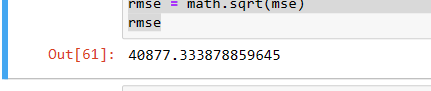